# String simulator results analysis

In [43]:
from matplotlib import pyplot as plt
from matplotlib import animation as ani
import numpy as np
import scipy as sp

import time
import pickle

In [44]:
#set serif font
plt.rcParams["font.family"]="serif"
plt.rcParams["mathtext.fontset"]="dejavuserif"

## Load simulation results

In [45]:
with open("open.dat", "rb") as f:
    s_open = pickle.load(f)

with open("palm.dat", "rb") as f:
    s_palm = pickle.load(f)

with open("harm.dat", "rb") as f:
    s_harm = pickle.load(f)

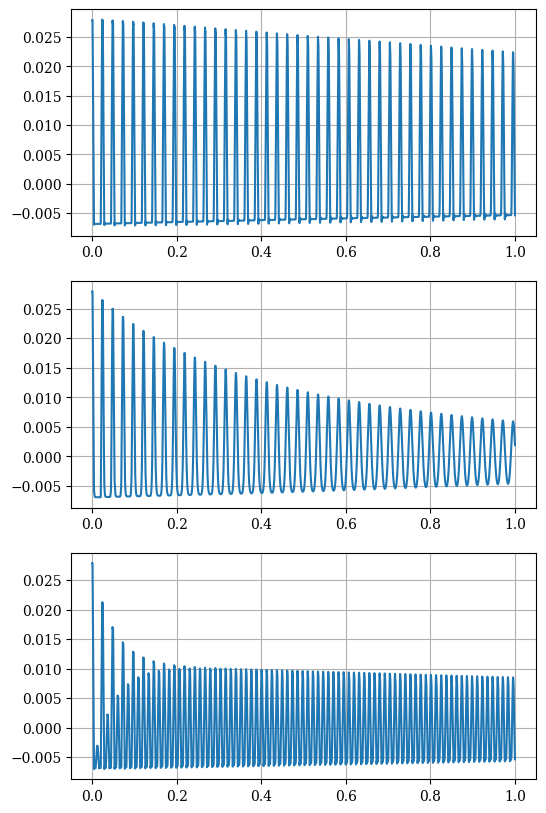

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(6, 10))

ax1.plot(s_open["t"], s_open["y"][400,:])
ax2.plot(s_palm["t"], s_palm["y"][400,:])
ax3.plot(s_harm["t"], s_harm["y"][400,:])

for a in (ax1, ax2, ax3):
    a.grid(True)

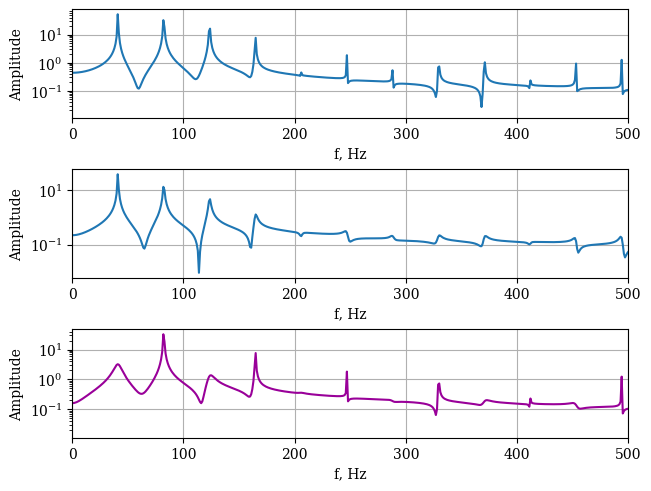

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, layout="constrained")

ft=sp.fft.fft(s_open["y"][400,:])
ft2=sp.fft.fft(s_palm["y"][400,:])
ft3=sp.fft.fft(s_harm["y"][400,:])

ax1.semilogy(np.absolute(ft))
ax2.semilogy(np.absolute(ft2))
ax3.semilogy(np.absolute(ft3))

ax1.set_xlim(left=0, right=500)
ax2.set_xlim(left=0, right=500)
ax3.set_xlim(left=0, right=500)

for a in (ax1, ax2, ax3):
    a.grid(True)
    #because the simulation duration is 1 second, frequencies are in units of Hz
    a.set_xlabel("f, Hz")
    a.set_ylabel("Amplitude")

plt.savefig("ftt.png", dpi=500)